# Trajectory Generation for a 2D Differential-Drive Mobile Robot

In this notebook, we implement trajectory generation using **polynomial interpolation**.
We consider a mobile robot moving in 2D from a starting point to a goal point.

We will:

1. Define the boundary conditions (start and goal)
2. Generate a cubic trajectory (3rd-degree polynomial)
3. Generate a quintic trajectory (5th-degree polynomial)
4. Compare the two methods in terms of position, velocity, and acceleration

## 1. Problem setup

We define the initial and final states of the robot in 2D.
We assume zero velocity and acceleration at the beginning and end.



In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Total time for the trajectory
T = 5.0  # seconds

# Time vector
t = np.linspace(0, T, 200)

# Initial position
x0, y0 = 0.0, 0.0

# Final position
xT, yT = 2.0, 1.0

# Initial and final velocities (vx, vy)
vx0, vy0 = 0.0, 0.0
vxT, vyT = 0.0, 0.0

# Initial and final accelerations (ax, ay) -- used for quintic
ax0, ay0 = 0.0, 0.0
axT, ayT = 0.0, 0.0


## 2. Cubic polynomial trajectory

We use a 3rd-degree polynomial of the form:

$
p(t) = a_0 + a_1 t + a_2 t^2 + a_3 t^3
$

This gives us 4 coefficients, which allows us to match:

- position at $ t = 0 $ and $ t = T $
- velocity at $ t = 0 $ and $ t = T $

We apply this separately to $ x(t) $ and $ y(t) $.


In [8]:
def solve_cubic(p0, pT, v0, vT, T):
    """
    Solves for coefficients of a cubic polynomial given boundary conditions.
    Args:
        p0: position at t=0
        pT: position at t=T
        v0: velocity at t=0
        vT: velocity at t=T
        T: duration
    Returns:
        a: array of 4 coefficients [a0, a1, a2, a3]
    """
    A = np.array([NaN, ..., ...]) # TODO liner system of equations
    b = np.array([NaN, ..., ...])
    
    return np.linalg.solve(A, b)

# Compute coefficients for x(t) and y(t)
a_x = solve_cubic(NaN, ..., ...)
a_y = solve_cubic(NaN, ..., ...)


In [10]:
def solve_cubic(p0, pT, v0, vT, T):
    """
    Solves for coefficients of a cubic polynomial given boundary conditions.
    Args:
        p0: position at t=0
        pT: position at t=T
        v0: velocity at t=0
        vT: velocity at t=T
        T: duration
    Returns:
        a: array of 4 coefficients [a0, a1, a2, a3]
    """
    A = np.array([NaN, ..., ...]) # TODO
    b = np.array([NaN, ..., ...]) # TODO
    return np.linalg.solve(A, b)

# Compute coefficients for x(t) and y(t)
a_x = solve_cubic(NaN, ..., ...) # TODO
a_y = solve_cubic(NaN, ..., ...) # TODO


In [11]:
def evaluate_cubic(a, t):
    """Evaluates cubic polynomial at times t."""
    return a[0] + a[1]*t + a[2]*t**2 + a[3]*t**3

# Compute trajectory points
x_cubic = evaluate_cubic(a_x, t)
y_cubic = evaluate_cubic(a_y, t)


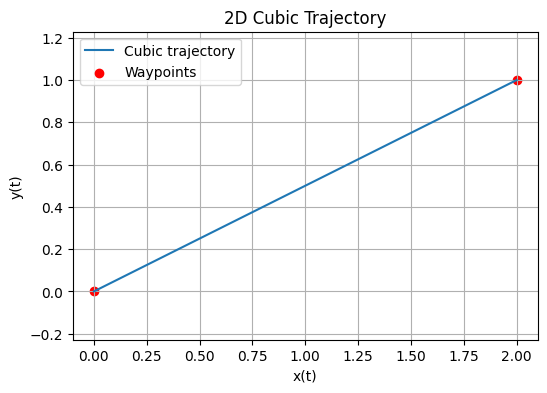

In [12]:
plt.figure(figsize=(6, 4))
plt.plot(x_cubic, y_cubic, label='Cubic trajectory')
plt.scatter([x0, xT], [y0, yT], color='red', label='Waypoints')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('2D Cubic Trajectory')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()


## 3. Quintic polynomial trajectory

We now use a 5th-degree polynomial:

$
p(t) = a_0 + a_1 t + a_2 t^2 + a_3 t^3 + a_4 t^4 + a_5 t^5
$

This allows us to match:

- position at $ t = 0 $ and $ t = T $
- velocity at $ t = 0 $ and $ t = T $
- acceleration at $ t = 0 $ and $ t = T $

This ensures $def solve_quintic(p0, pT, v0, vT, a0, aT, T):
    """
    Solves for coefficients of a quintic polynomial given boundary conditions.
    Returns:
        a: array of 6 coefficients
    """
    A = np.array([
        [1, 0, 0,    0,       0,         0],
        [1, T, T**2, T**3,    T**4,      T**5],
        [0, 1, 0,    0,       0,         0],
        [0, 1, 2*T,  3*T**2,  4*T**3,    5*T**4],
        [0, 0, 2,    0,       0,         0],
        [0, 0, 2,    6*T,    12*T**2,   20*T**3]
    ])
    b = np.array([p0, pT, v0, vT, a0, aT])
    return np.linalg.solve(A, b)

# Compute coefficients for x(t) and y(t)

Complete def solve_quintic


In [13]:
def solve_quintic(p0, pT, v0, vT, a0, aT, T):
    """
    Solves for coefficients of a quintic polynomial given boundary conditions.
    Returns:
        a: array of 6 coefficients
    """
    A = np.array([NaN, ..., ...]) # TODO
    b = np.array([NaN, ..., ...]) # TODO
    return np.linalg.solve(A, b)

# Compute coefficients for x(t) and y(t)
b_x = solve_quintic(NaN, ..., ...) # TODO
b_y = solve_quintic(NaN, ..., ...) # TODO


In [14]:
def evaluate_quintic(a, t):
    """Evaluates quintic polynomial at times t."""
    return (
        a[0] + a[1]*t + a[2]*t**2 + a[3]*t**3 +
        a[4]*t**4 + a[5]*t**5
    )

x_quintic = evaluate_quintic(b_x, t)
y_quintic = evaluate_quintic(b_y, t)


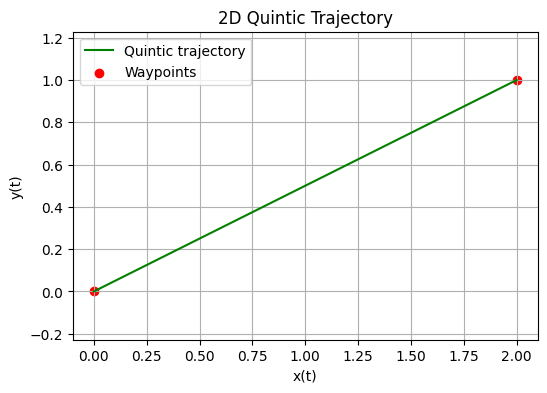

In [15]:
plt.figure(figsize=(6, 4))
plt.plot(x_quintic, y_quintic, color='green', label='Quintic trajectory')
plt.scatter([x0, xT], [y0, yT], color='red', label='Waypoints')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('2D Quintic Trajectory')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()


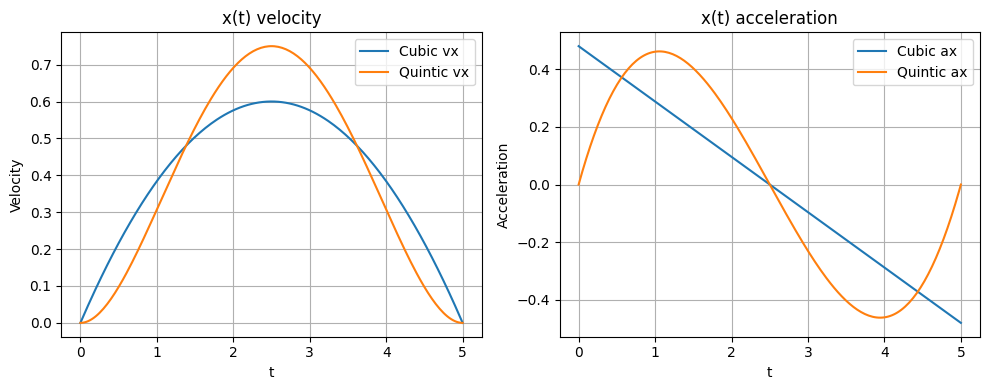

In [16]:
def compute_velocity_and_acceleration_cubic(a, t):
    v = a[1] + 2*a[2]*t + 3*a[3]*t**2
    a_ = 2*a[2] + 6*a[3]*t
    return v, a_

def compute_velocity_and_acceleration_quintic(a, t):
    v = a[1] + 2*a[2]*t + 3*a[3]*t**2 + 4*a[4]*t**3 + 5*a[5]*t**4
    a_ = 2*a[2] + 6*a[3]*t + 12*a[4]*t**2 + 20*a[5]*t**3
    return v, a_

vx_c, ax_c = compute_velocity_and_acceleration_cubic(a_x, t)
vx_q, ax_q = compute_velocity_and_acceleration_quintic(b_x, t)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, vx_c, label='Cubic vx')
plt.plot(t, vx_q, label='Quintic vx')
plt.xlabel('t'); plt.ylabel('Velocity')
plt.title('x(t) velocity')
plt.grid(); plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, ax_c, label='Cubic ax')
plt.plot(t, ax_q, label='Quintic ax')
plt.xlabel('t'); plt.ylabel('Acceleration')
plt.title('x(t) acceleration')
plt.grid(); plt.legend()

plt.tight_layout()
plt.show()


## 4. Conclusion

- **Cubic** trajectories are simple and smooth in velocity, but may have discontinuous accelerations.
- **Quintic** trajectories allow smooth acceleration profiles and are preferred in real-world robots.
- This method can be extended to multiple waypoints or optimized using additional criteria (e.g., minimum jerk).

Next steps could include:
- adding angular components (e.g., orientation \theta(t))
- implementing obstacle avoidance or curvature limits
- stitching piecewise segments with \( C^2 \) continuity


# Joint-Space Trajectory Generation for a 3-DOF Manipulator

This notebook generates smooth joint-space trajectories for a 3-link robotic manipulator.

Each joint angle is defined by a 5th-degree polynomial that ensures:

- Initial and final positions
- Zero velocity and acceleration at the start and end

This leads to smooth, physically plausible joint motions.


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Total time for the trajectory
T = 5.0  # seconds
t = np.linspace(0, T, 300)

# Initial joint positions (in radians)
q0 = np.array([0.0, -np.pi/6, np.pi/6])

# Final joint positions (in radians)
qT = np.array([np.pi/2, 0.0, -np.pi/4])

# Assume zero initial and final velocities and accelerations
dq0 = np.zeros(3)
dqT = np.zeros(3)
ddq0 = np.zeros(3)
ddqT = np.zeros(3)


## Quintic interpolation for each joint

Each joint $ q_i(t) $ follows a 5th-degree polynomial:

$
q_i(t) = a_0 + a_1 t + a_2 t^2 + a_3 t^3 + a_4 t^4 + a_5 t^5
$

We solve for coefficients that satisfy:

- $ q_i(0) = q0_i$, $ \dot{q}_i(0) = 0 $, $ \ddot{q}_i(0) = 0 $
- $ q_i(T) = qT_i $, $ \dot{q}_i(T) = 0 $, $ \ddot{q}_i(T) = 0 $


In [19]:
def solve_quintic(p0, pT, v0, vT, a0, aT, T):
    """
    Solve 5th-order polynomial given boundary conditions.
    """
    A = np.array([NaN, ..., ...]) # TODO liner system of equations
    b = np.array([NaN, ..., ...]) # TODO
    return np.linalg.solve(A, b)

# Solve for each joint 
coeffs = []
for i in range(3):
    a = solve_quintic(NaN, ..., NaN, ...,...) # TODO
    coeffs.append(a)
coeffs = np.array(coeffs)  # shape (3, 6)


In [20]:
def evaluate_quintic(a, t):
    return (
        a[0] + a[1]*t + a[2]*t**2 + a[3]*t**3 +
        a[4]*t**4 + a[5]*t**5
    )

def derivative_quintic(a, t):
    v = a[1] + 2*a[2]*t + 3*a[3]*t**2 + 4*a[4]*t**3 + 5*a[5]*t**4
    a_ = 2*a[2] + 6*a[3]*t + 12*a[4]*t**2 + 20*a[5]*t**3
    return v, a_

# Evaluate for all joints
q = np.zeros((3, len(t)))
dq = np.zeros((3, len(t)))
ddq = np.zeros((3, len(t)))

for i in range(3):
    q[i] = evaluate_quintic(coeffs[i], t)
    dq[i], ddq[i] = derivative_quintic(coeffs[i], t)


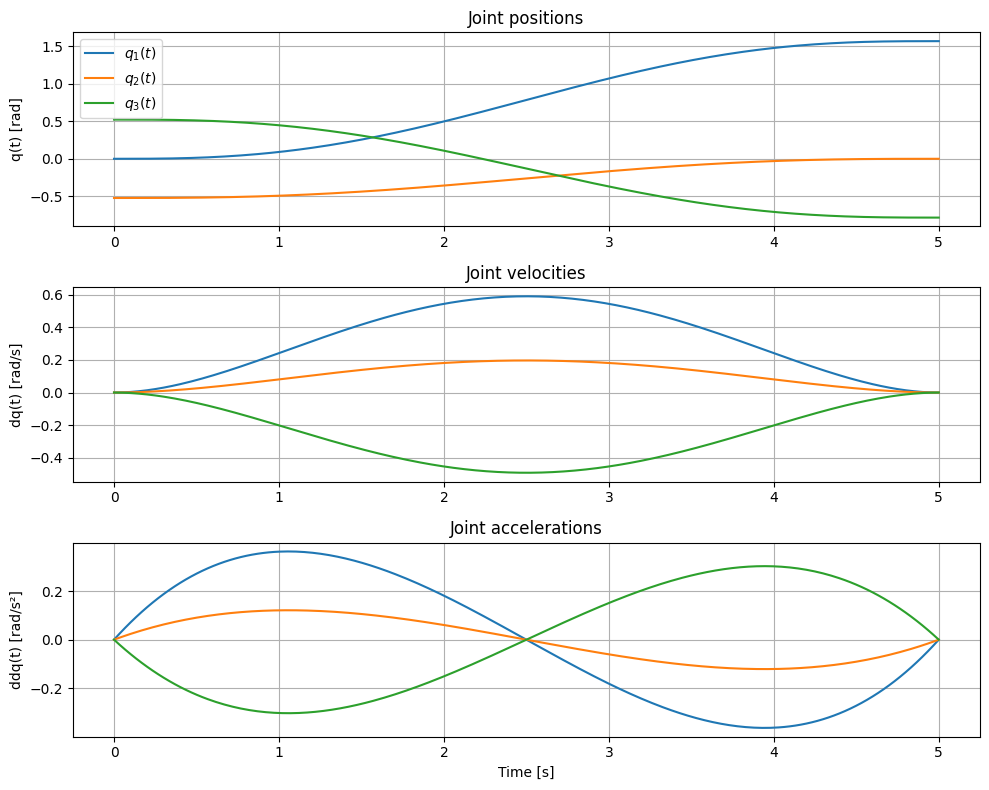

## Summary

- Each joint trajectory was computed independently using a 5th-degree polynomial.
- The trajectories start and end at rest, ensuring \( C^2 \) smoothness.
- This method is common in industrial robotics for generating point-to-point motion in joint space.

Next steps may include:
- Cartesian-space interpolation with inverse kinematics
- Obstacle-aware trajectory generation
- Torque or energy optimization


## Tips!
## Understanding the quintic trajectory matrix system

We want to compute a trajectory for a joint using a 5th-degree polynomial:

$$
q(t) = a_0 + a_1 t + a_2 t^2 + a_3 t^3 + a_4 t^4 + a_5 t^5
$$

This polynomial has 6 unknown coefficients: $a_0, a_1, a_2, a_3, a_4, a_5$.

We want it to satisfy 6 boundary conditions:

- $q(0) = q_0$ (initial position)
- $\dot{q}(0) = \dot{q}_0$ (initial velocity)
- $\ddot{q}(0) = \ddot{q}_0$ (initial acceleration)
- $q(T) = q_T$ (final position)
- $\dot{q}(T) = \dot{q}_T$ (final velocity)
- $\ddot{q}(T) = \ddot{q}_T$ (final acceleration)

---

### Derivatives of the polynomial

- First derivative:

  $$
  \dot{q}(t) = a_1 + 2a_2 t + 3a_3 t^2 + 4a_4 t^3 + 5a_5 t^4
  $$

- Second derivative:

  $$
  \ddot{q}(t) = 2a_2 + 6a_3 t + 12a_4 t^2 + 20a_5 t^3
  $$

---

### Constructing the system of equations

We write the 6 equations using these expressions at $t=0$ and $t=T$:

$$
\begin{aligned}
q(0) &= a_0 \\
\dot{q}(0) &= a_1 \\
\ddot{q}(0) &= 2a_2 \\
q(T) &= a_0 + a_1 T + a_2 T^2 + a_3 T^3 + a_4 T^4 + a_5 T^5 \\
\dot{q}(T) &= a_1 + 2a_2 T + 3a_3 T^2 + 4a_4 T^3 + 5a_5 T^4 \\
\ddot{q}(T) &= 2a_2 + 6a_3 T + 12a_4 T^2 + 20a_5 T^3
\end{aligned}
$$

This is a linear system $A \cdot a = b$, where:

- $A$ is a $6 \times 6$ matrix (depends on $T$)
- $a = [a_0, a_1, a_2, a_3, a_4, a_5]^T$ — the unknowns
- $b = [q_0, \dot{q}_0, \ddot{q}_0, q_T, \dot{q}_T, \ddot{q}_T]^T$ — known boundary conditions

---

### In NumPy (Python):

```python
A = np.array([
    [1, 0,     0,       0,         0,           0      ],  # q(0)
    [0, 1,     0,       0,         0,           0      ],  # q'(0)
    [0, 0,     2,       0,         0,           0      ],  # q''(0)
    [1, T,   T**2,    T**3,      T**4,        T**5     ],  # q(T)
    [0, 1,   2*T,    3*T**2,    4*T**3,      5*T**4    ],  # q'(T)
    [0, 0,     2,     6*T,     12*T**2,     20*T**3    ]   # q''(T)
])



# Piecewise Polynomial Trajectory Generation

This notebook demonstrates how to generate smooth trajectories through a series of 1D waypoints using:

- Cubic splines (automatically computed)
- Manually stitched 5th-degree (quintic) polynomials

We ensure $C^2$ continuity between segments to achieve smooth velocity and acceleration.


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline


In [33]:
# Define waypoints and time stamps
t_waypoints = np.array([0, 1, 2, 4, 6])
x_waypoints = np.array([0.0, 1.0, 0.5, 2.0, 1.5])


## 1. Cubic spline trajectory

We use SciPy's `CubicSpline`, which builds a natural spline with:

- $C^2$ continuity across all segments
- Zero second derivative at the endpoints (natural boundary)

Use `scipy.interpolate.CubicSpline` to construct a $C^2$-continuous trajectory.
Assume natural boundary conditions (zero second derivative at the endpoints).



In [34]:
# TODO: create cubic spline interpolator and evaluate

t_fine = np.linspace(t_waypoints[0], t_waypoints[-1], 500)

# Create cubic spline
cs = CubicSpline(...)  # TODO

# Evaluate position, velocity, acceleration
x_cubic = cs(t_fine)
v_cubic = cs(t_fine, 1)
a_cubic = cs(t_fine, 2)


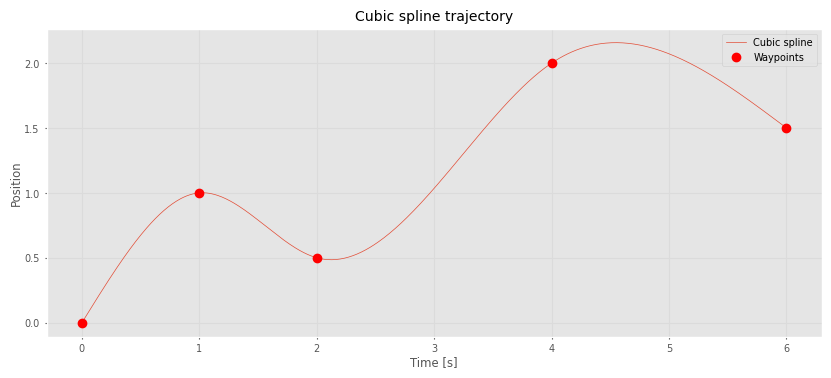

In [35]:
plt.figure(figsize=(10, 4))
plt.plot(t_fine, x_cubic, label='Cubic spline')
plt.plot(t_waypoints, x_waypoints, 'ro', label='Waypoints')
plt.xlabel('Time [s]')
plt.ylabel('Position')
plt.title('Cubic spline trajectory')
plt.grid(True)
plt.legend()
plt.show()


## 2. Piecewise quintic trajectory

Now we manually build quintic polynomials between each pair of waypoints.

To keep it simple, we assume:

- Zero velocity and acceleration at all waypoints.
- This allows computing each segment independently.
- Each segment satisfies 6 conditions:
  - $x(t_0)$, $x(t_1)$
  - $\dot{x}(t_0)=0$, $\dot{x}(t_1)=0$
  - $\ddot{x}(t_0)=0$, $\ddot{x}(t_1)=0$


In [36]:
# TODO: implement solver for a single quintic segment

def solve_quintic_segment(p0, p1, t0, t1):
    T = t1 - t0
    A = np.array([NaN, ..., ..., ]) # TODO
    b = np.array([...])  # TODO: boundary conditions for position, velocity, acceleration
    return np.linalg.solve(A, b)


In [37]:
# TODO: evaluate all quintic segments and store results

t_full = []
x_full = []

for i in range(len(t_waypoints) - 1):
    t0, t1 = t_waypoints[i], t_waypoints[i+1]
    p0, p1 = x_waypoints[i], x_waypoints[i+1]

    coeffs = solve_quintic_segment(p0, p1, t0, t1)  # TODO: implement

    t_seg = np.linspace(t0, t1, 100)
    t_rel = t_seg - t0

    x_seg = np.polyval(..., ...)  # TODO: evaluate segment
    t_full.append(t_seg)
    x_full.append(x_seg)

t_quintic = np.concatenate(t_full)
x_quintic = np.concatenate(x_full)


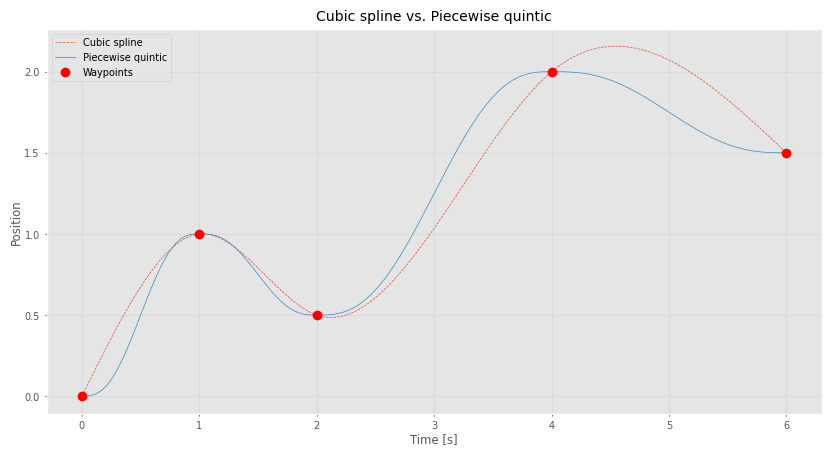

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(t_fine, x_cubic, label='Cubic spline', linestyle='--')
plt.plot(t_quintic, x_quintic, label='Piecewise quintic', linestyle='-')
plt.plot(t_waypoints, x_waypoints, 'ro', label='Waypoints')
plt.xlabel('Time [s]')
plt.ylabel('Position')
plt.title('Cubic spline vs. Piecewise quintic')
plt.grid(True)
plt.legend()
plt.show()


## 4. Velocity and acceleration comparison

We now compare the velocity and acceleration of both trajectories.

This helps illustrate the difference in smoothness and dynamic feasibility.


In [39]:
# Cubic spline derivatives (already supported by scipy)
v_cubic = cs(t_fine, 1)
a_cubic = cs(t_fine, 2)


In [40]:
# TODO: compute velocity and acceleration for each quintic segment

v_quintic_full = []
a_quintic_full = []

for i in range(len(t_waypoints) - 1):
    t0, t1 = t_waypoints[i], t_waypoints[i+1]
    p0, p1 = x_waypoints[i], x_waypoints[i+1]
    T = t1 - t0

    coeffs = solve_quintic_segment(p0, p1, t0, t1)

    t_seg = np.linspace(0, T, 100)

    v_seg = ...  # TODO: derivative of q(t)
    a_seg = ...  # TODO: second derivative of q(t)

    v_quintic_full.append(v_seg)
    a_quintic_full.append(a_seg)

v_quintic = np.concatenate(v_quintic_full)
a_quintic = np.concatenate(a_quintic_full)


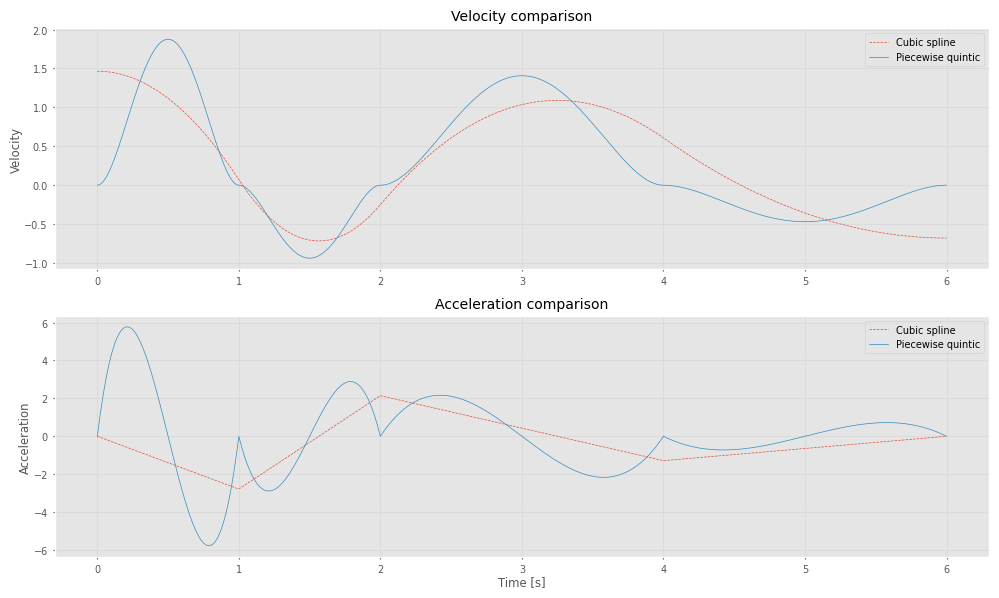

In [41]:
plt.figure(figsize=(10, 6))

# Velocity
plt.subplot(2,1,1)
plt.plot(t_fine, v_cubic, label='Cubic spline', linestyle='--')
plt.plot(t_quintic, v_quintic, label='Piecewise quintic', linestyle='-')
plt.ylabel('Velocity')
plt.title('Velocity comparison')
plt.grid(True)
plt.legend()

# Acceleration
plt.subplot(2,1,2)
plt.plot(t_fine, a_cubic, label='Cubic spline', linestyle='--')
plt.plot(t_quintic, a_quintic, label='Piecewise quintic', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration')
plt.title('Acceleration comparison')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## 5. Summary

In this assignment, you:

- Implemented two methods of trajectory generation
- Built a cubic spline using SciPy
- Constructed a smooth piecewise quintic interpolation by hand
- Compared position, velocity, and acceleration profiles

**Bonus challenge**: Allow nonzero velocities at waypoints and enforce continuity across segments.


## 6. Observations

- Both trajectories are smooth and $C^2$-continuous.
- The cubic spline shows some oscillation due to natural boundary conditions.
- Piecewise quintic trajectories are smoother by construction (zero velocity and acceleration at segment boundaries).
- In practice, non-zero velocities at waypoints would require continuity constraints across segments — this was omitted here for clarity.

Next steps (optional):
- Add time scaling or waypoint velocities
- Extend to 2D/3D or joint-space planning
- Implement real robot motion using these profiles
